# Performing Analysis of Meteorological Data

In this project, we will perform data cleaning, analysis for testing the (given) Hypothesis and finally put our conclusion on analysis of Meteorological Data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"C:\Users\ss\Downloads\weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22,Partly cloudy throughout the day.


In [3]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [5]:
df_1=df[['Formatted Date','Apparent Temperature (C)','Humidity']]
df_1.head(10)

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
5,2006-04-01 05:00:00.000 +0200,7.111111,0.85
6,2006-04-01 06:00:00.000 +0200,5.522222,0.95
7,2006-04-01 07:00:00.000 +0200,6.527778,0.89
8,2006-04-01 08:00:00.000 +0200,10.822222,0.82
9,2006-04-01 09:00:00.000 +0200,13.772222,0.72


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df_1['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df_1=df_1.set_index('Formatted Date')

In [8]:
df_1.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)

In [9]:
df_2=df_1[['Apparent Temperature','Humidity']].resample('MS').mean()
df_2

,Apparent Temperature,Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


Apparent Temperature and Humidity variation yearly from 2006 to 2016

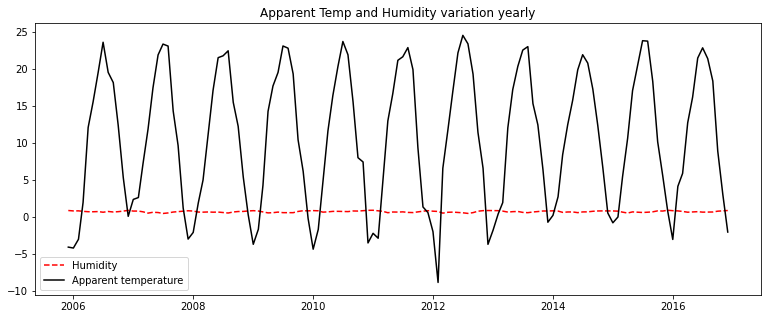

In [10]:
plt.figure(figsize= (13,5))
plt.plot(df_2['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(df_2['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation yearly')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in January Month from 2006 to 2016

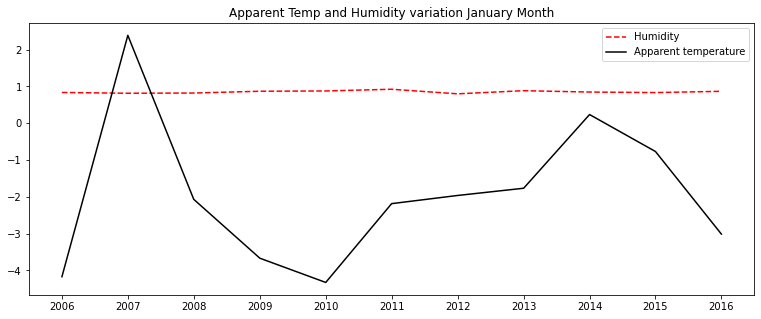

In [11]:
jan=df_2[df_2.index.month == 1]
plt.figure(figsize= (13,5))
plt.plot(jan['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(jan['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation January Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in Febuary Month from 2006 to 2016

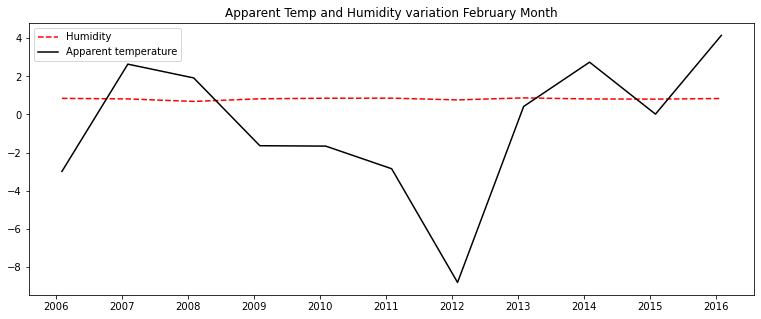

In [12]:
feb=df_2[df_2.index.month == 2]
plt.figure(figsize= (13,5))
plt.plot(feb['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(feb['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation February Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in March Month from 2006 to 2016

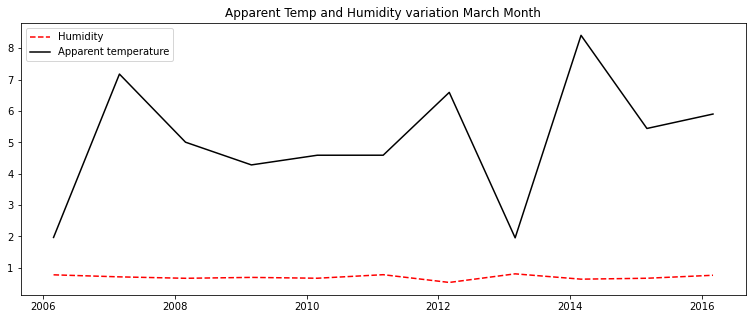

In [13]:
mar=df_2[df_2.index.month == 3]
plt.figure(figsize= (13,5))
plt.plot(mar['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(mar['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation March Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in April Month from 2006 to 2016

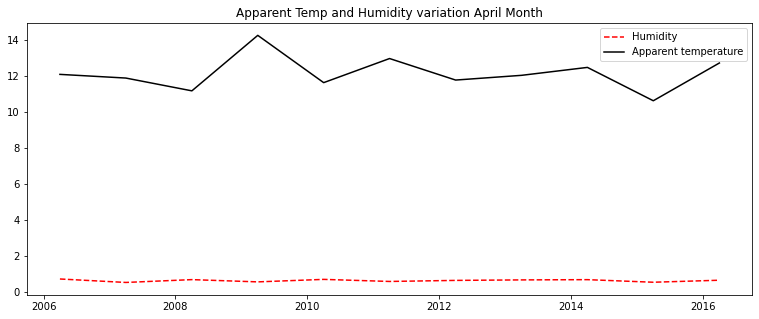

In [14]:
apr=df_2[df_2.index.month == 4]
plt.figure(figsize= (13,5))
plt.plot(apr['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(apr['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation April Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in May Month from 2006 to 2016

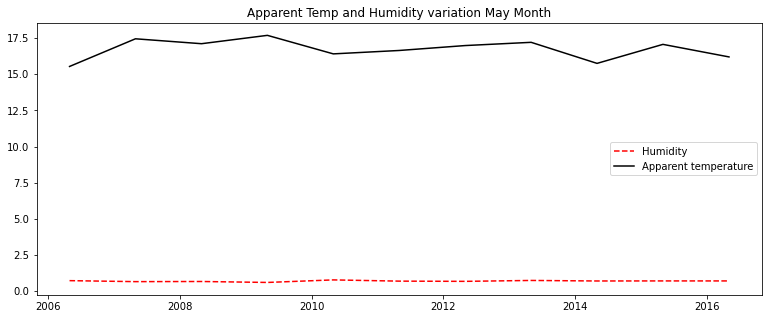

In [15]:
may=df_2[df_2.index.month == 5]
plt.figure(figsize= (13,5))
plt.plot(may['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(may['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation May Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in june Month from 2006 to 2016

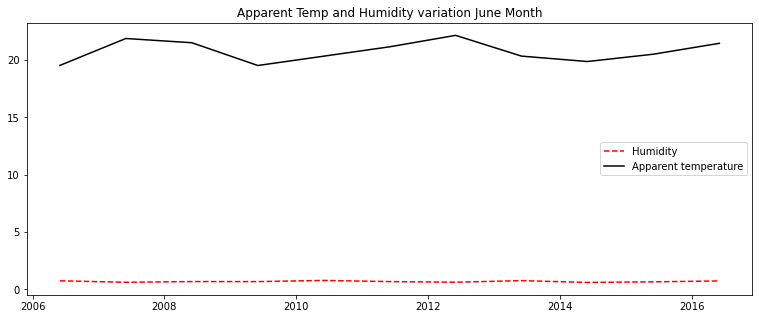

In [16]:
june=df_2[df_2.index.month == 6]
plt.figure(figsize= (13,5))
plt.plot(june['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(june['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation June Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in July Month from 2006 to 2016

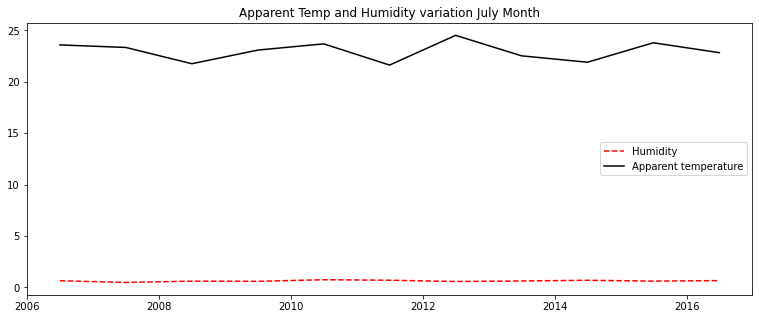

In [17]:
july=df_2[df_2.index.month == 7]
plt.figure(figsize= (13,5))
plt.plot(july['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(july['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation July Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in August Month from 2006 to 2016

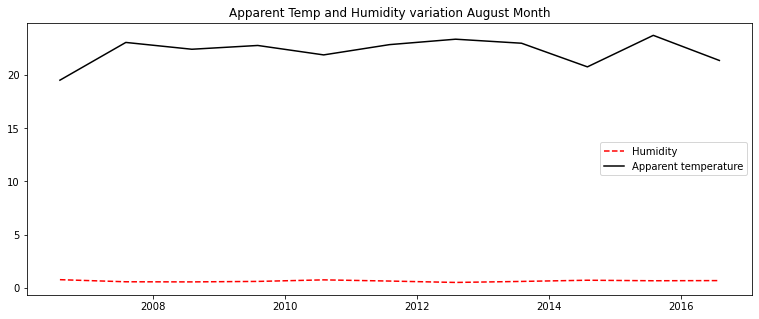

In [18]:
aug=df_2[df_2.index.month == 8]
plt.figure(figsize= (13,5))
plt.plot(aug['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(aug['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation August Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in September month from 2006 to 2016

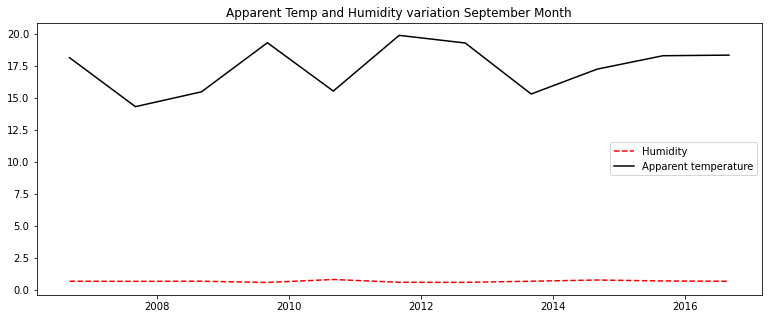

In [19]:
sep=df_2[df_2.index.month == 9]
plt.figure(figsize= (13,5))
plt.plot(sep['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(sep['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation September Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in October Month from 2006 to 2016

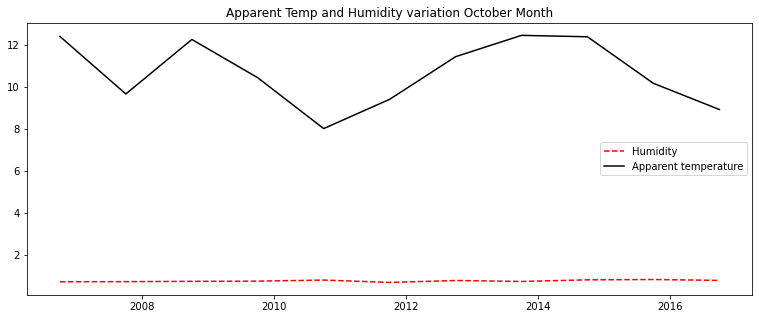

In [20]:
oct=df_2[df_2.index.month == 10]
plt.figure(figsize= (13,5))
plt.plot(oct['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(oct['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation October Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in November Month from 2006 to 2016

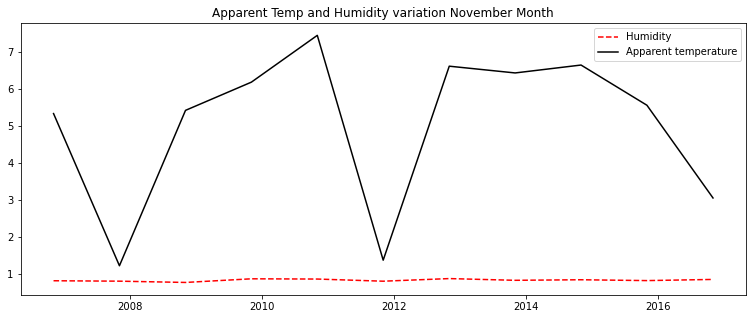

In [21]:
nov=df_2[df_2.index.month == 11]
plt.figure(figsize= (13,5))
plt.plot(nov['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(nov['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation November Month')
plt.legend(loc= 0)

Apparent Temperature and Humidity variation in December Month from 2006 to 2016

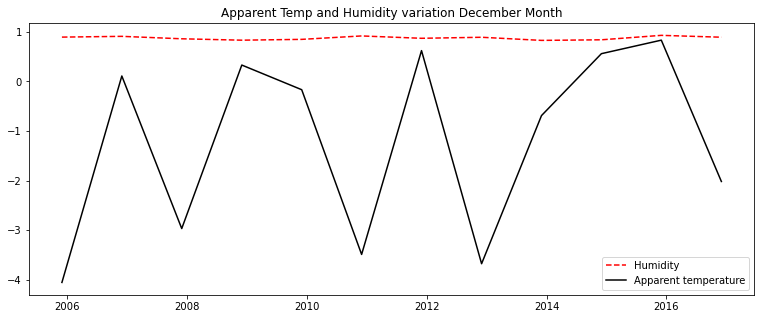

In [22]:
dec=df_2[df_2.index.month == 12]
plt.figure(figsize= (13,5))
plt.plot(dec['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(dec['Apparent Temperature'], label = 'Apparent temperature', color= 'black')
plt.title('Apparent Temp and Humidity variation December Month')
plt.legend(loc= 0)

NULL Hypothesis testing 

In [23]:
a = df_2['Apparent Temperature']
b = df_2['Humidity']
test = stats.ttest_rel(a,b)
p_value = test[1]
print(p_value)


6.686806829267691e-24


In [24]:
if p_value < 0.05:         #alpha value is 0.05 or 5%
    print("We are Rejecting Null Hypothesis")
else:
    print("We are Accepting Null Hypothesis")

We are Rejecting Null Hypothesis


# Conclusion :

The above graphs show many ups and downs in the temperature and the average humidity has remained constant throughout the 10 years.From this analysis, We can conclude that the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming.